In [1]:
import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')

import pickle

from sklearn import metrics
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0)
df_test_features = pd.read_csv('kc_house_data_test_features.csv', index_col=0)

In [3]:
df_untouched = pd.read_csv('kc_house_data_train.csv', index_col=0)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [5]:
df.shape

(17290, 21)

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c433898>]],
      dtype=object)

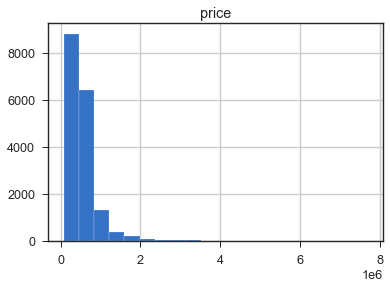

In [50]:
df.hist('price', bins=20)

In [8]:
df['log_price'] = df['price'].apply(lambda x: np.log(x))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c2ee6d8>]],
      dtype=object)

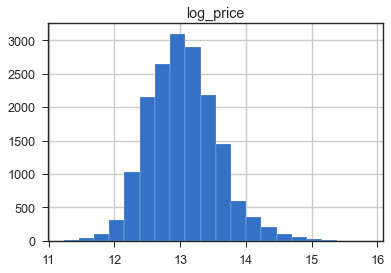

In [49]:
df.hist('log_price', bins=20)

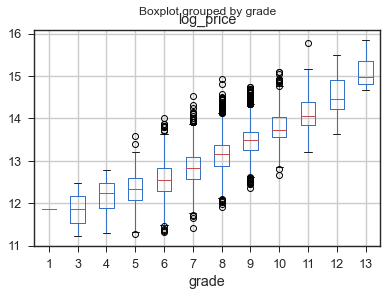

In [10]:
sns.set_style('ticks')
df.boxplot('log_price', 'grade')

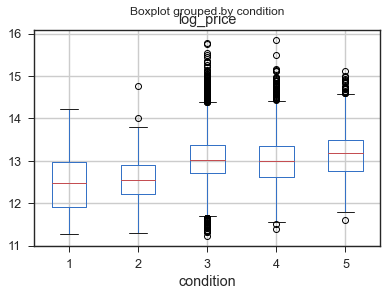

In [11]:
df.boxplot('log_price', 'condition')

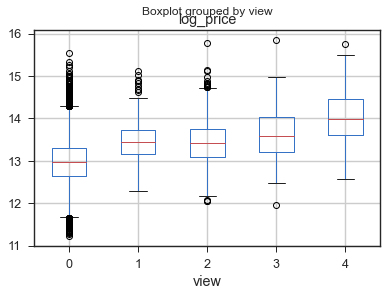

In [12]:
df.boxplot('log_price', 'view')

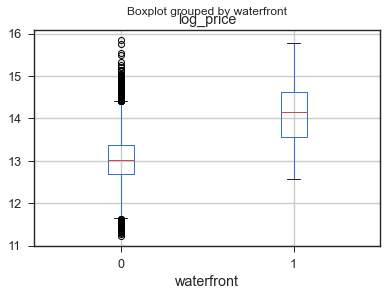

In [13]:
df.boxplot('log_price', 'waterfront')

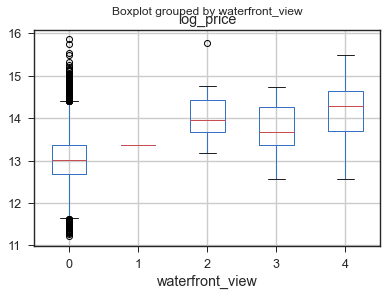

In [14]:
df['waterfront_view'] = df['waterfront'] * df['view']
df.boxplot('log_price', 'waterfront_view')

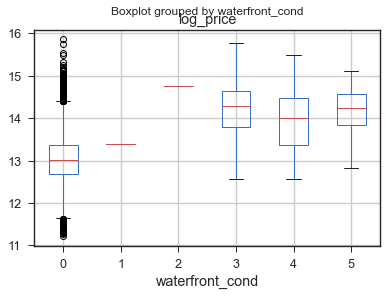

In [15]:
df['waterfront_cond'] = df['waterfront'] * df['condition']
df.boxplot('log_price', 'waterfront_cond')

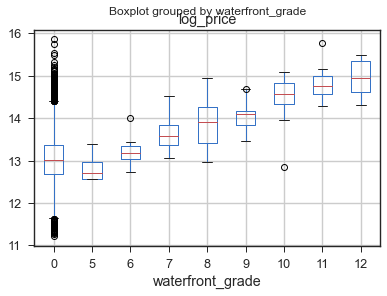

In [16]:
df['waterfront_grade'] = df['waterfront'] * df['grade']
df.boxplot('log_price', 'waterfront_grade')

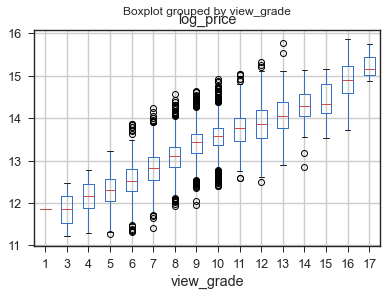

In [19]:
df['view_grade'] = df['view'] + df['grade']
df.boxplot('log_price', 'view_grade')

In [20]:
df['bedrooms'] = np.where(df['bedrooms'] > 10, 10, df['bedrooms'])

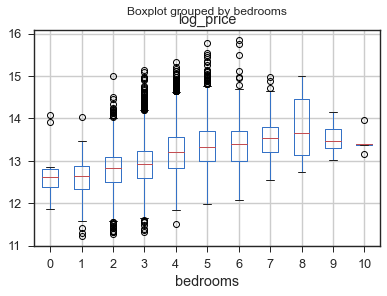

In [21]:
df.boxplot('log_price', 'bedrooms')

In [22]:
df['living_bed_ratio'] = df['sqft_living'] / df['bedrooms']

In [29]:
df['living_bed_ratio'] = np.where(df['living_bed_ratio'] == np.inf,
                                  df['living_bed_ratio'].min(), df['living_bed_ratio'])


In [30]:
df['log_living_bed_ratio'] = df['living_bed_ratio'].apply(lambda x: np.log(x))

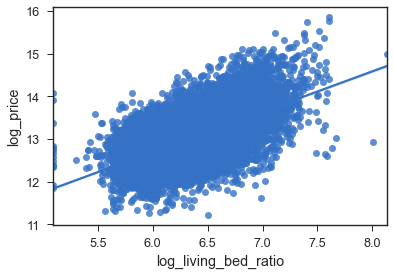

In [32]:
sns.regplot(df['log_living_bed_ratio'], df['log_price'])

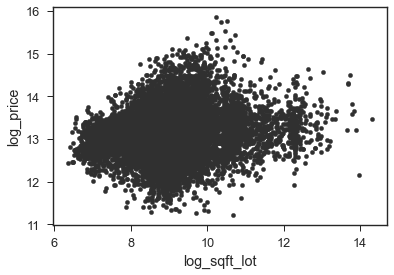

In [34]:
df['log_sqft_lot'] = df['sqft_lot'].apply(lambda x: np.log(x))
df.plot.scatter('log_sqft_lot', 'log_price')

In [36]:
df['sqft_yard'] = df['sqft_lot'] - (df['sqft_living'] / df['floors'])

In [43]:
df['sqft_yard'] = np.where(df['sqft_yard'] < 0, df['sqft_yard'].median(), df['sqft_yard'])

In [44]:
df['sqft_yard'].min(), df['sqft_yard'].max()

(21.66666666666663, 1650059.0)

In [45]:
df['log_sqft_yard'] = df['sqft_yard'].apply(lambda x: np.log(x))

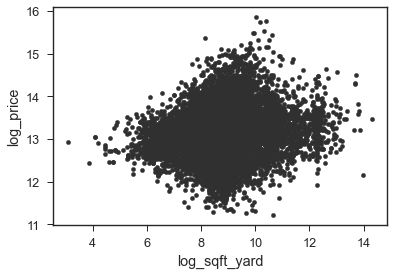

In [46]:
df.plot.scatter('log_sqft_yard', 'log_price')

In [47]:
df['view'].unique()

array([0, 2, 3, 4, 1])

In [48]:
df['bathrooms'].unique()

array([2.25, 3.  , 2.5 , 3.5 , 2.  , 1.  , 1.75, 3.75, 3.25, 4.25, 2.75,
       1.5 , 4.5 , 4.  , 4.75, 0.75, 0.  , 5.  , 5.5 , 6.  , 1.25, 5.75,
       6.75, 5.25, 6.5 , 8.  , 7.5 , 6.25, 0.5 , 7.75])

In [51]:
df['log_sqft_living'] = df['sqft_living'].apply(lambda x: np.log(x))

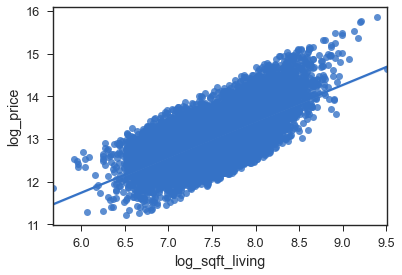

In [52]:
sns.regplot(df['log_sqft_living'], df['log_price'])

In [57]:
f = 'log_price~log_sqft_living'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                 1.461e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        14:59:29   Log-Likelihood:                -8159.0
No. Observations:               17290   AIC:                         1.632e+04
Df Residuals:                   17288   BIC:                         1.634e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.6976      0.053    127.262      0.000       6.594       6.801
log_sqft_living     0.8410      0.007    120.857      0.000       0.827       0.855
==============================================================================
Omnibus:                       93.895   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.313
Skew:                           0.149   Prob(JB):                     4.04e-20
Kurtosis:                       2.814   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
df['yr_built_reno'] = np.where(df['yr_renovated'] == 0, df['yr_built'], df['yr_renovated'])

In [55]:
df['yr_built_reno'].dtype

dtype('int64')

In [56]:
df['yr_built_reno'].describe()

count    17290.000000
mean      1973.158010
std         28.805976
min       1900.000000
25%       1954.000000
50%       1977.000000
75%       1999.000000
max       2015.000000
Name: yr_built_reno, dtype: float64

In [73]:
columns = ['grade', 'view', 'condition', 'floors']
dummies = pd.get_dummies(data=df, columns=columns, prefix=columns, drop_first=True)
dummies.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'log_price', 'waterfront_view', 'waterfront_cond', 'waterfront_grade',
       'living_bed_ratio', 'log_living_bed_ratio', 'bed_bath_ratio',
       'log_sqft_lot', 'sqft_yard', 'log_sqft_yard', 'log_sqft_living',
       'grade_binned', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13',
       'view_1', 'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'floors_3.5'],
      dtype='object')

In [74]:
dummies.shape

(17290, 53)

In [75]:
df.shape

(17290, 33)

In [80]:
df_cheap = df[df['price'] < 1500000]

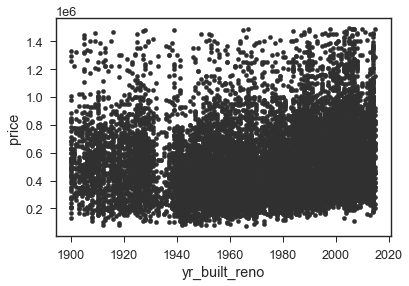

In [81]:
df_cheap.plot.scatter('yr_built_reno', 'price')

In [82]:
conditions = [
                df['yr_built_reno'] <= 1923,
                df['yr_built_reno'] <= 1946,
                df['yr_built_reno'] <= 1969,
                df['yr_built_reno'] <= 1992
]

choices = [
            1,
            2,
            3,
            4
]

df['built_reno'] = np.select(conditions, choices, 5)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,living_bed_ratio,log_living_bed_ratio,bed_bath_ratio,log_sqft_lot,sqft_yard,log_sqft_yard,log_sqft_living,grade_binned,yr_built_reno,built_reno
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,517.5,6.249010,1.777778,9.093020,7858.0,8.969287,7.635304,3,1986,4
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,580.0,6.363028,1.666667,8.814330,3830.0,8.250620,7.972466,3,1977,4
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,942.5,6.848536,1.600000,9.295876,9008.0,9.105868,8.234830,5,1997,5
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,1520.0,7.326466,0.857143,9.589325,12328.0,9.419628,8.425078,5,1990,4
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,850.0,6.745236,1.200000,8.589700,4101.0,8.318986,7.843849,4,2004,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bd93e10>]],
      dtype=object)

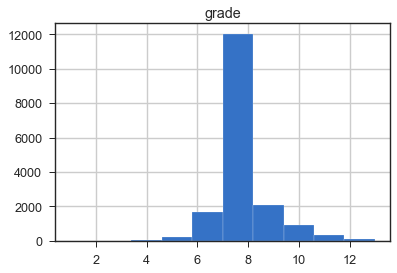

In [83]:
df.hist('grade')

In [84]:
f = 'price~built_reno'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     205.7
Date:                Fri, 01 May 2020   Prob (F-statistic):           2.18e-46
Time:                        10:35:33   Log-Likelihood:            -2.4626e+05
No. Observations:               17290   AIC:                         4.925e+05
Df Residuals:                   17288   BIC:                         4.925e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.203e+05   8860.689     47.431      0.000    4.03e+05    4.38e+05
built_reno  3.316e+04   2311.666     14.343      0.000    2.86e+04    3.77e+04
==============================================================================
Omnibus:                    16026.495   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1121345.860
Skew:                           4.281   Prob(JB):                         0.00
Kurtosis:                      41.513   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
df.groupby('floors')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
floors,,,,,,,,
1.0,8606.0,4.434050e+05,2.666541e+05,75000.0,277338.0,390000.0,530000.0,4668000.0
1.5,1524.0,5.525950e+05,2.957326e+05,92000.0,350000.0,517000.0,682000.0,3650000.0
2.0,6538.0,6.504333e+05,4.427774e+05,130000.0,379000.0,546350.0,774000.0,7062500.0
2.5,140.0,1.094988e+06,9.025717e+05,255000.0,550000.0,824000.0,1327500.0,7700000.0
3.0,475.0,5.861594e+05,3.477195e+05,205000.0,385000.0,499000.0,631000.0,3100000.0
3.5,7.0,1.004500e+06,1.034411e+06,479000.0,525000.0,544000.0,829250.0,3300000.0


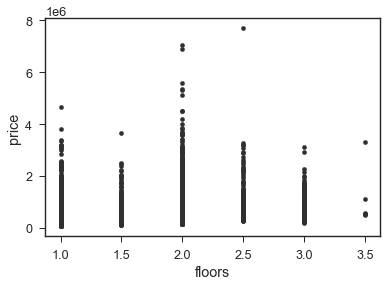

In [86]:
df.plot.scatter('floors', 'price')

In [87]:
columns = ['grade', 'view', 'condition', 'floors', 'built_reno']
df = pd.get_dummies(data=df, columns=columns, prefix=columns, drop_first=True)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'log_price', 'waterfront_view', 'waterfront_cond', 'waterfront_grade',
       'living_bed_ratio', 'log_living_bed_ratio', 'bed_bath_ratio',
       'log_sqft_lot', 'sqft_yard', 'log_sqft_yard', 'log_sqft_living',
       'grade_binned', 'yr_built_reno', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'view_1', 'view_2', 'view_3', 'view_4',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'built_reno_2', 'built_reno_3', 'built_reno_4', 'built_reno_5'],
      dtype='object')

In [116]:
df['bed_bath_ratio'].fillna(value=0, inplace=True)
df['bed_bath_ratio'].isna().sum()

0

In [117]:
df['bed_bath_ratio'] = np.where(df['bed_bath_ratio'] == np.inf, 0, df['bed_bath_ratio'])

In [118]:
df[df['bed_bath_ratio'] == np.inf]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,...,floors_1_half,floors_2,floors_2_half,floors_3,floors_3_half,built_reno_2,built_reno_3,built_reno_4,built_reno_5,log_sqft_living15


In [91]:
df['bed_bath_ratio'].describe()

count    17290.000000
mean         1.753484
std          0.659255
min          0.000000
25%          1.333333
50%          1.600000
75%          2.000000
max          8.000000
Name: bed_bath_ratio, dtype: float64

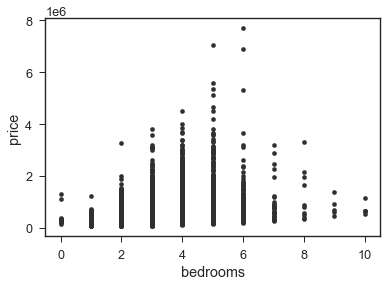

In [92]:
df.plot.scatter('bedrooms', 'price')

In [93]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'log_price', 'waterfront_view', 'waterfront_cond', 'waterfront_grade',
       'living_bed_ratio', 'log_living_bed_ratio', 'bed_bath_ratio',
       'log_sqft_lot', 'sqft_yard', 'log_sqft_yard', 'log_sqft_living',
       'grade_binned', 'yr_built_reno', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'view_1', 'view_2', 'view_3', 'view_4',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'built_reno_2', 'built_reno_3', 'built_reno_4', 'built_reno_5'],
      dtype='object')

In [94]:
'+'.join(['grade_' + str(i) for i in range(3,14)])

'grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13'

In [95]:
df['log_sqft_living'] = df['sqft_living'].apply(lambda x: np.log(x))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12da286d8>]],
      dtype=object)

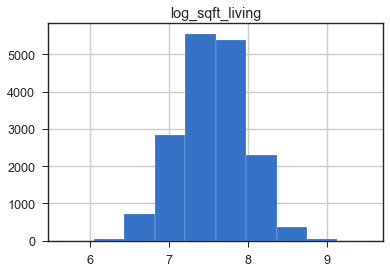

In [96]:
df.hist('log_sqft_living')

In [97]:
floor_dict = {
            'floors_1.5': 'floors_1_half',
            'floors_2.0': 'floors_2',
            'floors_2.5': 'floors_2_half',
            'floors_3.0': 'floors_3',
            'floors_3.5': 'floors_3_half'
}

In [98]:
df = df.rename(columns=floor_dict)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'log_price', 'waterfront_view', 'waterfront_cond', 'waterfront_grade',
       'living_bed_ratio', 'log_living_bed_ratio', 'bed_bath_ratio',
       'log_sqft_lot', 'sqft_yard', 'log_sqft_yard', 'log_sqft_living',
       'grade_binned', 'yr_built_reno', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'view_1', 'view_2', 'view_3', 'view_4',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'floors_1_half', 'floors_2', 'floors_2_half', 'floors_3',
       'floors_3_half', 'built_reno_2', 'built_reno_3', 'built_reno_4',
       'built_reno_5'],
      dtype='object')

In [99]:
df_untouched.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [100]:
'+'.join(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'])

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15'

In [103]:
f_untouched = 'price~bedrooms+bathrooms+sqft_living+floors+waterfront+view+condition+grade+yr_built+sqft_living15+sqft_lot15'
model = ols(formula=f_untouched, data=df_untouched).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2962.
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        10:37:03   Log-Likelihood:            -2.3721e+05
No. Observations:               17290   AIC:                         4.744e+05
Df Residuals:                   17278   BIC:                         4.745e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.343e+06   1.48e+05     42.811      0.000    6.05e+06    6.63e+06
bedrooms      -3.889e+04   2261.372    -17.196      0.000   -4.33e+04   -3.45e+04
bathrooms      4.688e+04   3878.429     12.087      0.000    3.93e+04    5.45e+04
sqft_living     167.2713      4.050     41.306      0.000     159.334     175.209
floors         2.375e+04   3894.875      6.098      0.000    1.61e+04    3.14e+04
waterfront     5.927e+05   2.06e+04     28.741      0.000    5.52e+05    6.33e+05
view           4.343e+04   2513.772     17.278      0.000    3.85e+04    4.84e+04
condition      1.937e+04   2788.889      6.944      0.000    1.39e+04    2.48e+04
grade          1.195e+05   2549.650     46.857      0.000    1.14e+05    1.24e+05
yr_built      -3649.3877     76.347    -47.800      0.000   -3799.035   -3499.740
sqft_living15    24.8856      4.016      6.197      0.000      17.014      32.757
sqft_lot15       -0.5216      0.063     -8.240      0.000      -0.646      -0.398
==============================================================================
Omnibus:                    13695.210   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1131223.215
Skew:                           3.228   Prob(JB):                         0.00
Kurtosis:                      42.097   Cond. No.                     2.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'log_price', 'waterfront_view', 'waterfront_cond', 'waterfront_grade',
       'living_bed_ratio', 'log_living_bed_ratio', 'bed_bath_ratio',
       'log_sqft_lot', 'sqft_yard', 'log_sqft_yard', 'log_sqft_living',
       'grade_binned', 'yr_built_reno', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'view_1', 'view_2', 'view_3', 'view_4',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'floors_1_half', 'floors_2', 'floors_2_half', 'floors_3',
       'floors_3_half', 'built_reno_2', 'built_reno_3', 'built_reno_4',
       'built_reno_5'],
      dtype='object')

In [105]:
df['log_sqft_living'] = df['sqft_living'].apply(lambda x: np.log(x))

In [106]:
df['log_sqft_living15'] = df['sqft_living15'].apply(lambda x: np.log(x))

(<matplotlib.axes._subplots.AxesSubplot at 0x12514aa58>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12b03f518>)

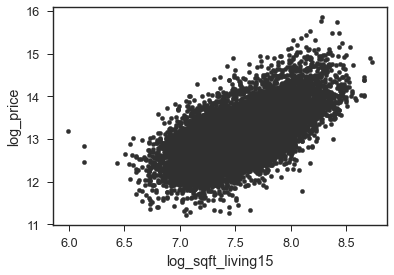

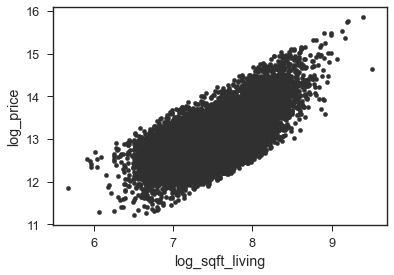

In [107]:
df.plot.scatter('log_sqft_living15', 'log_price'), df.plot.scatter('log_sqft_living', 'log_price')

In [108]:
f = 'price~waterfront+view_1+view_2+view_3+view_4+floors_1_half+floors_2+floors_2_half+floors_3+floors_3_half+built_reno_2+built_reno_3+built_reno_4+built_reno_5+sqft_living+bedrooms+condition_2+condition_3+condition_4+condition_5+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1166.
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        10:37:13   Log-Likelihood:            -2.3660e+05
No. Observations:               17290   AIC:                         4.733e+05
Df Residuals:                   17258   BIC:                         4.735e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.418e+05   2.13e+05      1.138      0.255   -1.75e+05    6.58e+05
waterfront     5.339e+05   2.26e+04     23.642      0.000     4.9e+05    5.78e+05
view_1         1.366e+05   1.33e+04     10.275      0.000    1.11e+05    1.63e+05
view_2         7.143e+04   7973.600      8.958      0.000    5.58e+04    8.71e+04
view_3         1.226e+05   1.09e+04     11.244      0.000    1.01e+05    1.44e+05
view_4         2.715e+05   1.65e+04     16.453      0.000    2.39e+05    3.04e+05
floors_1_half  2294.1060   6464.218      0.355      0.723   -1.04e+04     1.5e+04
floors_2      -2.053e+04   4917.273     -4.175      0.000   -3.02e+04   -1.09e+04
floors_2_half  1.161e+05   1.86e+04      6.238      0.000    7.97e+04    1.53e+05
floors_3       7.218e+04   1.11e+04      6.527      0.000    5.05e+04    9.39e+04
floors_3_half  2.258e+05   8.05e+04      2.805      0.005    6.81e+04    3.84e+05
built_reno_2  -3.812e+04   7929.812     -4.807      0.000   -5.37e+04   -2.26e+04
built_reno_3  -1.467e+05   7404.172    -19.817      0.000   -1.61e+05   -1.32e+05
built_reno_4  -2.161e+05   7614.238    -28.384      0.000   -2.31e+05   -2.01e+05
built_reno_5  -1.866e+05   8185.579    -22.790      0.000   -2.03e+05   -1.71e+05
sqft_living     161.7915      3.428     47.203      0.000     155.073     168.510
bedrooms      -1.561e+04   2326.626     -6.711      0.000   -2.02e+04   -1.11e+04
condition_2    2.101e+04    4.8e+04      0.438      0.661    -7.3e+04    1.15e+05
condition_3    2.836e+04   4.47e+04      0.634      0.526   -5.93e+04    1.16e+05
condition_4    5.764e+04   4.47e+04      1.289      0.198      -3e+04    1.45e+05
condition_5    1.092e+05    4.5e+04      2.429      0.015    2.11e+04    1.97e+05
grade_3       -1.494e+05   2.64e+05     -0.566      0.571   -6.67e+05    3.68e+05
grade_4       -9.021e+04   2.21e+05     -0.407      0.684   -5.24e+05    3.44e+05
grade_5       -1.205e+05   2.17e+05     -0.554      0.579   -5.47e+05    3.06e+05
grade_6       -5.596e+04   2.17e+05     -0.258      0.797   -4.82e+05     3.7e+05
grade_7         3.48e+04   2.17e+05      0.160      0.873   -3.91e+05     4.6e+05
grade_8        1.241e+05   2.17e+05      0.571      0.568   -3.02e+05     5.5e+05
grade_9        2.562e+05   2.17e+05      1.179      0.238    -1.7e+05    6.82e+05
grade_10       4.347e+05   2.17e+05      2.000      0.046    8600.644    8.61e+05
grade_11       6.954e+05   2.18e+05      3.194      0.001    2.69e+05    1.12e+06
grade_12       1.203e+06   2.19e+05      5.490      0.000    7.73e+05    1.63e+06
grade_13       2.609e+06   2.27e+05     11.474      0.000    2.16e+06    3.05e+06
==============================================================================
Omnibus:                    10220.072   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB

In [110]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'log_price', 'waterfront_view', 'waterfront_cond', 'waterfront_grade',
       'living_bed_ratio', 'log_living_bed_ratio', 'bed_bath_ratio',
       'log_sqft_lot', 'sqft_yard', 'log_sqft_yard', 'log_sqft_living',
       'grade_binned', 'yr_built_reno', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'view_1', 'view_2', 'view_3', 'view_4',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'floors_1_half', 'floors_2', 'floors_2_half', 'floors_3',
       'floors_3_half', 'built_reno_2', 'built_reno_3', 'built_reno_4',
       'built_reno_5', 'log_sqft_living15'],
      dtype='object')

In [257]:
features = df.drop(['id', 'date', 'price', 'zipcode', 'lat', 'long', 'yr_built', 'yr_renovated', 'log_price', 'grade_binned'], axis = 1)

In [258]:
features = features.drop(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_yard', 'yr_built_reno'], axis = 1)

In [126]:
type(df)

pandas.core.frame.DataFrame

In [129]:
df['log_sqft_basement'] = df['sqft_basement'].apply(lambda x: np.log(x))

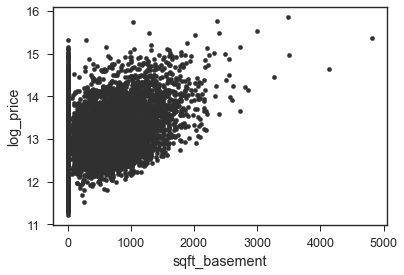

In [131]:
df.plot.scatter('sqft_basement', 'log_price')

In [133]:
df['has_basement'] = np.where(df['sqft_basement'] == 0, 0, 1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,...,floors_2_half,floors_3,floors_3_half,built_reno_2,built_reno_3,built_reno_4,built_reno_5,log_sqft_living15,log_sqft_basement,has_basement
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,0,2070,0,...,0,0,0,0,0,1,0,7.779049,-inf,0
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,0,1830,1070,...,0,0,0,0,0,1,0,7.770645,6.975414,1
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,0,3770,0,...,0,0,0,0,0,0,1,8.218787,-inf,0
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,0,4560,0,...,0,0,0,0,0,1,0,8.306472,-inf,0
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,0,2550,0,...,0,0,0,0,0,0,1,7.718685,-inf,0


In [ ]:
df['has_basement'].unique()

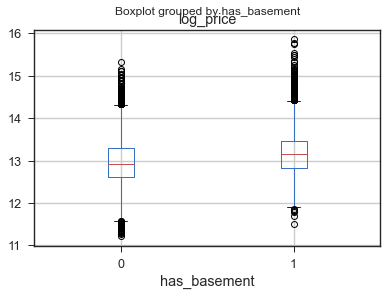

In [135]:
df.boxplot('log_price', 'has_basement')

In [132]:
df_untouched.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [256]:
features.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=129)

In [259]:
features = features.drop(['sqft_living15', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'waterfront_view', 'waterfront_cond', 'waterfront_grade',
       'living_bed_ratio', 'built_reno_2', 'built_reno_3', 'built_reno_4', 'built_reno_5'], axis = 1)

In [142]:
features.columns

Index(['bedrooms', 'bathrooms', 'waterfront', 'log_living_bed_ratio',
       'bed_bath_ratio', 'log_sqft_lot', 'log_sqft_yard', 'log_sqft_living',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'view_1',
       'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floors_1_half', 'floors_2',
       'floors_2_half', 'floors_3', 'floors_3_half', 'log_sqft_living15'],
      dtype='object')

In [260]:
features['log_price'] = df['log_price']
# features['has_basement'] = df['has_basement']

In [261]:
features['log_living_bed_ratio'] = np.where(features['log_living_bed_ratio'] == np.inf, 0, features['log_living_bed_ratio'])
df['log_living_bed_ratio'] = np.where(df['log_living_bed_ratio'] == np.inf, 0, df['log_living_bed_ratio'])



In [262]:
features['log_living_bed_ratio'].min(), features['log_living_bed_ratio'].max()

(0.0, 8.13739583005665)

In [253]:
df['zipcode'].value_counts()

98052    474
98115    465
98103    461
98038    455
98117    437
        ... 
98102     80
98010     74
98024     65
98148     43
98039     42
Name: zipcode, Length: 70, dtype: int64

In [264]:
features['zipcode'] = df['zipcode']

In [265]:
features = pd.get_dummies(data=features, columns=['zipcode'], prefix='zip', drop_first=True)
features.columns

Index(['bedrooms', 'bathrooms', 'waterfront', 'log_living_bed_ratio',
       'bed_bath_ratio', 'log_sqft_lot', 'log_sqft_yard', 'log_sqft_living',
       'grade_3', 'grade_4',
       ...
       'zip_98146', 'zip_98148', 'zip_98155', 'zip_98166', 'zip_98168',
       'zip_98177', 'zip_98178', 'zip_98188', 'zip_98198', 'zip_98199'],
      dtype='object', length=105)

In [267]:
features_list = list(features.columns)
features_list.remove('log_price')

In [268]:
f_list = '+'.join(features_list)
f_list

'bedrooms+bathrooms+waterfront+log_living_bed_ratio+bed_bath_ratio+log_sqft_lot+log_sqft_yard+log_sqft_living+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13+view_1+view_2+view_3+view_4+condition_2+condition_3+condition_4+condition_5+floors_1_half+floors_2+floors_2_half+floors_3+floors_3_half+log_sqft_living15+log_sqft_basement+has_basement+zip_98002+zip_98003+zip_98004+zip_98005+zip_98006+zip_98007+zip_98008+zip_98010+zip_98011+zip_98014+zip_98019+zip_98022+zip_98023+zip_98024+zip_98027+zip_98028+zip_98029+zip_98030+zip_98031+zip_98032+zip_98033+zip_98034+zip_98038+zip_98039+zip_98040+zip_98042+zip_98045+zip_98052+zip_98053+zip_98055+zip_98056+zip_98058+zip_98059+zip_98065+zip_98070+zip_98072+zip_98074+zip_98075+zip_98077+zip_98092+zip_98102+zip_98103+zip_98105+zip_98106+zip_98107+zip_98108+zip_98109+zip_98112+zip_98115+zip_98116+zip_98117+zip_98118+zip_98119+zip_98122+zip_98125+zip_98126+zip_98133+zip_98136+zip_98144+zip_98146+zip_98148+zip

In [284]:
features.replace([np.inf, -np.inf], 0, inplace=True)

In [316]:
f = 'log_price~' + f_list
model2 = ols(formula=f, data=features).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1267.
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        14:33:17   Log-Likelihood:                 5216.8
No. Observations:               17290   AIC:                        -1.022e+04
Df Residuals:                   17185   BIC:                            -9409.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.4074      0.194     38.189      0.000       7.027       7.788
bedrooms                -0.0205      0.004     -5.066      0.000      -0.028      -0.013
bathrooms                0.0533      0.006      9.422      0.000       0.042       0.064
waterfront               0.4647      0.019     23.892      0.000       0.427       0.503
log_living_bed_ratio     0.0042      0.007      0.584      0.559      -0.010       0.018
bed_bath_ratio           0.0136      0.005      2.567      0.010       0.003       0.024
log_sqft_lot             0.0269      0.013      2.023      0.043       0.001       0.053
log_sqft_yard            0.0272      0.011      2.424      0.015       0.005       0.049
log_sqft_living          0.4317      0.011     39.931      0.000       0.410       0.453
grade_3                 -0.3048      0.229     -1.331      0.183      -0.754       0.144
grade_4                 -0.2270      0.193     -1.178      0.239      -0.605       0.151
grade_5                 -0.2639      0.190     -1.389      0.165      -0.636       0.109
grade_6                 -0.2056      0.190     -1.083      0.279      -0.578       0.167
grade_7                 -0.1408      0.190     -0.741      0.458      -0.513       0.231
grade_8                 -0.0545      0.190     -0.287      0.774      -0.427       0.318
grade_9                  0.0602      0.190      0.317      0.752      -0.312       0.433
grade_10                 0.1498      0.190      0.787      0.431      -0.223       0.523
grade_11                 0.2633      0.191      1.381      0.167      -0.110       0.637
grade_12                 0.3800      0.192      1.981      0.048       0.004       0.756
grade_13                 0.6501      0.199      3.269      0.001       0.260       1.040
view_1                   0.1114      0.011      9.735      0.000       0.089       0.134
view_2                   0.1073      0.007     15.489      0.000       0.094       0.121
view_3                   0.1704      0.009     17.957      0.000       0.152       0.189
view_4                   0.2741      0.014     19.272      0.000       0.246       0.302
condition_2              0.2021      0.041      4.971      0.000       0.122       0.282
condition_3              0.3174      0.038      8.372      0.000       0.243       0.392
condition_4              0.3547      0.038      9.350      0.000       0.280       0.429
condition_5              0.4247      0.038     11.128      0.000       0.350       0.500
floors_1_half            0.0042      0.006      0.759      0.448      -0.007       0.015
floors_2                -0.0136      0.005     -2.804      0.005      -0.023      -0.004
floors_2_half            0.0192      0.016      1.181      0.238      -0.013       0.051
floors_3                -0.0899      0.010     -8.637    

In [ ]:
df['log_sqft_living15'] = df['sqft_living15'].apply(lambda x: np.log(x))

In [ ]:
df.plot.scatter('log_sqft_living', 'log_price')

In [ ]:
df.plot.scatter('sqft_living', 'price')

In [ ]:
df.plot.scatter('sqft_living15', 'log_price')

In [ ]:
features.columns

In [ ]:
df['log_sqft_living15'].corr(df_dummied['log_sqft_living'])

# TRAIN-TEST SPLIT!!!

In [168]:
features.columns

Index(['bedrooms', 'bathrooms', 'waterfront', 'log_living_bed_ratio',
       'bed_bath_ratio', 'log_sqft_lot', 'log_sqft_yard', 'log_sqft_living',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'view_1',
       'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floors_1_half', 'floors_2',
       'floors_2_half', 'floors_3', 'floors_3_half', 'log_sqft_living15',
       'has_basement', 'log_price'],
      dtype='object')

In [217]:
df['floors']

KeyError: 'floors'

In [218]:
features['log_sqft_yard'].describe()

count    17286.000000
mean         8.745708
std          1.044236
min          3.075775
25%          8.244794
50%          8.725751
75%          9.115590
max         14.316322
Name: log_sqft_yard, dtype: float64

In [275]:
features['log_sqft_yard'].fillna(features['log_sqft_yard'].median(), inplace=True)

In [278]:
features['log_sqft_yard'].isna().sum()

0

In [193]:
features['log_sqft_living'].max()

9.513403546466266

In [290]:
Y = features.log_price
feature_cols = ['bedrooms', 'bathrooms', 'waterfront', 'log_living_bed_ratio',
       'log_sqft_lot', 'log_sqft_yard']
X=features[feature_cols]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, random_state=3)

In [291]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [292]:
accuracy = regressor.score(x_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 41%'

In [296]:
Y = features.log_price
feature_cols = features_list
X=features[feature_cols]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, random_state=3)


In [297]:
target = features['log_price']
X_train, X_test, y_train, y_test = train_test_split(features[feature_cols], target, random_state=20,test_size=0.2)

In [298]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train =pd.DataFrame(data=scaler.transform(X_train), columns=feature_cols)
X_test =pd.DataFrame(data=scaler.transform(X_test), columns=feature_cols)

In [299]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)


train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

y_pred = lm.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)

Training Root Mean Squared Error: 0.17800901828046325
Testing Root Mean Squared Error: 0.18357130038675815
Training:  0.17800901828046325 vs. Testing:  0.18357130038675815


Training Error: 0.14252314366213187
Testing Error: 0.1985714583841003


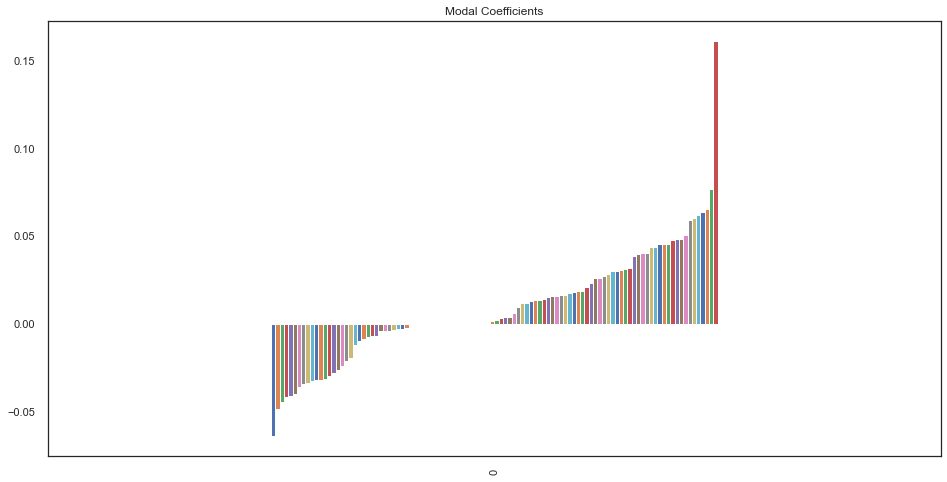

In [322]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.005, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred_lasso = lasso.predict(X_train)
y_pred_lasso = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred_lasso)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [311]:
coefficient = lasso_coef01.T
coefficient

,0
zip_98023,-0.064947
zip_98042,-0.049383
zip_98092,-0.043468
zip_98003,-0.040747
zip_98038,-0.037927
...,...
zip_98103,0.049480
zip_98112,0.054193
zip_98004,0.067315
log_sqft_living15,0.070245


In [315]:
coefficient[coefficient[0] == 0]

,0
zip_98024,0.0
zip_98014,-0.0
zip_98011,-0.0
zip_98010,-0.0
zip_98028,-0.0
zip_98065,-0.0
zip_98070,-0.0
zip_98072,0.0
zip_98027,0.0
bedrooms,-0.0


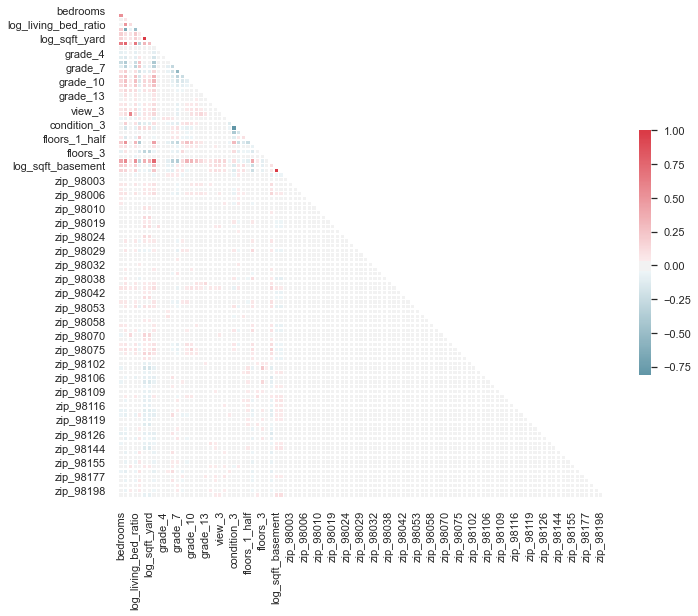

In [302]:

sns.set(style="white")


# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [303]:
len(features_list)

104